# Project 1 Code

#### Important Imports // Set up Enviornment

## Important Imports // Set up Enviornment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = r'C:\Users\NV\Downloads\data mining\Project 1/digital_literacy_dataset.csv'
digl_df=pd.read_csv(file_path) ## This is reading the csv file!

In [5]:
digl_df.head() ## Note: The data shown below is data without any pre-processing. This is the raw and unfiltered data. 

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3


### Pre-Processing

In [5]:
len(digl_df) ## Amount of Rows, specifcally specific person(s).
digl_df.shape ## Amount of Columns, specifically the specific questions asked.

(1000, 23)

In [6]:
digl_df.isnull().values.any()

True

Because there is missing data, we are going to remove it. Importance of pre-processing!

In [7]:
# Check which columns have missing values
missing_values = digl_df.isnull().sum()
print(missing_values)


User_ID                                           0
Age                                               0
Gender                                            0
Education_Level                                 212
Employment_Status                                 0
Household_Income                                  0
Location_Type                                     0
Basic_Computer_Knowledge_Score                    0
Internet_Usage_Score                              0
Mobile_Literacy_Score                             0
Post_Training_Basic_Computer_Knowledge_Score      0
Post_Training_Internet_Usage_Score                0
Post_Training_Mobile_Literacy_Score               0
Modules_Completed                                 0
Average_Time_Per_Module                           0
Quiz_Performance                                  0
Session_Count                                     0
Engagement_Level                                  0
Adaptability_Score                                0
Feedback_Rat

Shown above are all of the 23 columns, what is indicated by 0 refers indicataes that there are null values and all the data is correct. The one column that is 212, means that of the 1000 people who took the survey, 212 didn't fill this out. I will be removing this data from the dataset under new variable so there are comparisons. 

In [10]:
digl_df_cl = digl_df.dropna()
print(digl_df_cl) ## This is the cleaned data, without any missing values.



    User_ID  Age  Gender Education_Level Employment_Status Household_Income  \
0     U0001   43    Male         Primary           Student           Medium   
1     U0002   60  Female     High School            Farmer              Low   
2     U0003   47  Female         Primary            Farmer              Low   
3     U0004   34  Female       Secondary            Farmer              Low   
4     U0005   50    Male     High School             Other           Medium   
..      ...  ...     ...             ...               ...              ...   
994   U0995   21    Male         Primary             Other           Medium   
995   U0996   30  Female         Primary        Unemployed              Low   
996   U0997   30  Female       Secondary           Student           Medium   
997   U0998   31  Female       Secondary            Farmer              Low   
998   U0999   62    Male       Secondary            Farmer           Medium   

    Location_Type  Basic_Computer_Knowledge_Score  

In [11]:
digl_df = digl_df.drop(columns=['Engagement_Level', 'Feedback_Rating', 'Adaptability_Score'])
digl_df.drop(["User_ID"], axis=1, inplace=True)

print(digl_df.head())


   Age  Gender Education_Level Employment_Status Household_Income  \
0   43    Male         Primary           Student           Medium   
1   60  Female     High School            Farmer              Low   
2   47  Female         Primary            Farmer              Low   
3   34  Female       Secondary            Farmer              Low   
4   50    Male     High School             Other           Medium   

  Location_Type  Basic_Computer_Knowledge_Score  Internet_Usage_Score  \
0    Semi-Rural                              25                     1   
1         Rural                              22                    14   
2    Semi-Rural                              14                    31   
3         Rural                               6                    32   
4         Rural                              14                    41   

   Mobile_Literacy_Score  Post_Training_Basic_Computer_Knowledge_Score  \
0                     33                                            54  

In [12]:
digl_df.info()
len(digl_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           1000 non-null   int64  
 1   Gender                                        1000 non-null   object 
 2   Education_Level                               788 non-null    object 
 3   Employment_Status                             1000 non-null   object 
 4   Household_Income                              1000 non-null   object 
 5   Location_Type                                 1000 non-null   object 
 6   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 7   Internet_Usage_Score                          1000 non-null   int64  
 8   Mobile_Literacy_Score                         1000 non-null   int64  
 9   Post_Training_Basic_Computer_Knowledge_Score  1000 non-null   in

1000

Okay! In our pre-processing section, we dropped null values of education and created a new variable titled digl_df_cl. We will need this variable later. However, because that is the only column that even had null valuables, I decided to keep it apart of the dataset as it has other valuable information that will be needed for discussion later. 

##### Visualization

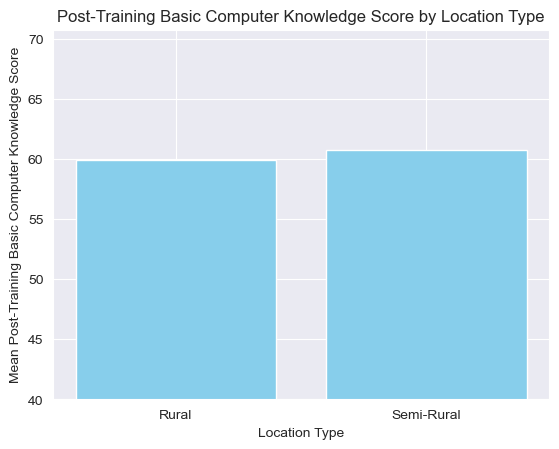

Mean Difference: 0.88


In [50]:
mean_scores = digl_df.groupby('Location_Type')['Post_Training_Basic_Computer_Knowledge_Score'].mean().reset_index()

mean_scores = mean_scores[mean_scores['Location_Type'].isin(['Semi-Rural', 'Rural'])]

plt.bar(mean_scores['Location_Type'], mean_scores['Post_Training_Basic_Computer_Knowledge_Score'], color='skyblue')


plt.ylim([40, max(mean_scores['Post_Training_Basic_Computer_Knowledge_Score']) + 10])

plt.title('Post-Training Basic Computer Knowledge Score by Location Type')

plt.xlabel('Location Type')

plt.ylabel('Mean Post-Training Basic Computer Knowledge Score')

plt.xticks(rotation=0)

plt.show()


mean_scores = digl_df.groupby('Location_Type')['Post_Training_Basic_Computer_Knowledge_Score'].mean()


semi_rural_mean = mean_scores['Semi-Rural']
rural_mean = mean_scores['Rural']
mean_difference = semi_rural_mean - rural_mean

# Print the difference
print(f"Mean Difference: {mean_difference:.2f}")



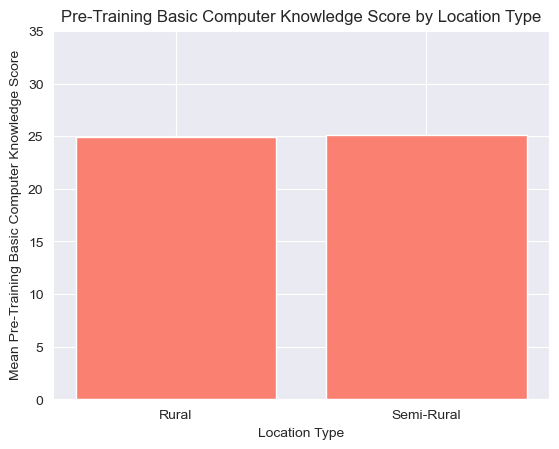

Mean Pre-Training Difference: 0.21


In [41]:
mean_scores_pre = digl_df.groupby('Location_Type')['Basic_Computer_Knowledge_Score'].mean().reset_index()

mean_scores_pre = mean_scores_pre[mean_scores_pre['Location_Type'].isin(['Semi-Rural', 'Rural'])]


plt.bar(mean_scores_pre['Location_Type'], mean_scores_pre['Basic_Computer_Knowledge_Score'], color='salmon')

plt.ylim([0, max(mean_scores_pre['Basic_Computer_Knowledge_Score']) + 10])

plt.title('Pre-Training Basic Computer Knowledge Score by Location Type')

plt.xlabel('Location Type')

plt.ylabel('Mean Pre-Training Basic Computer Knowledge Score')

plt.xticks(rotation=0)

plt.show()

mean_scores_pre = digl_df.groupby('Location_Type')['Basic_Computer_Knowledge_Score'].mean()
semi_rural_mean_pre = mean_scores_pre['Semi-Rural']
rural_mean_pre = mean_scores_pre['Rural']
mean_difference_pre = semi_rural_mean_pre - rural_mean_pre

print(f"Mean Pre-Training Difference: {mean_difference_pre:.2f}")

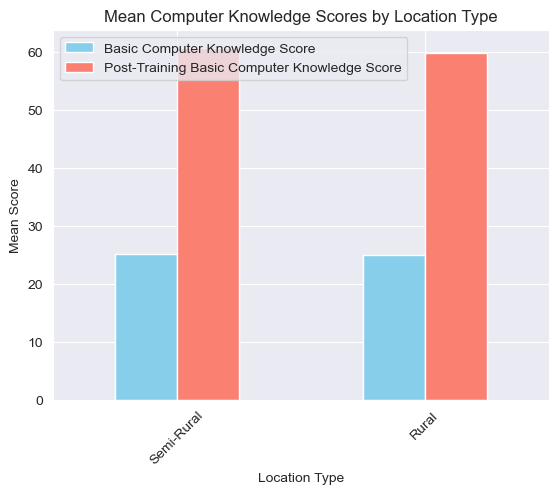

In [21]:
mean_scores = digl_df.groupby('Location_Type')[['Basic_Computer_Knowledge_Score', 'Post_Training_Basic_Computer_Knowledge_Score']].mean()

mean_scores = mean_scores.loc[['Semi-Rural', 'Rural']]

mean_scores.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Mean Computer Knowledge Scores by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(['Basic Computer Knowledge Score', 'Post-Training Basic Computer Knowledge Score'])
plt.show()


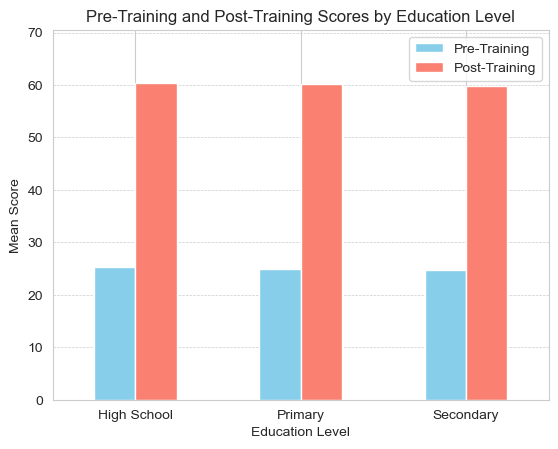

In [27]:


filtered_df = digl_df[digl_df['Education_Level'].isin(['Primary', 'High School', 'Secondary'])]

mean_scores_education = filtered_df.groupby('Education_Level')[['Basic_Computer_Knowledge_Score', 'Post_Training_Basic_Computer_Knowledge_Score']].mean()

mean_scores_education.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Pre-Training and Post-Training Scores by Education Level')

plt.xlabel('Education Level')

plt.ylabel('Mean Score')

plt.xticks(rotation=0)

plt.legend(['Pre-Training', 'Post-Training'])

plt.ylim([0, max(mean_scores_education[['Basic_Computer_Knowledge_Score', 'Post_Training_Basic_Computer_Knowledge_Score']].max()) + 10])

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5) 
plt.show()


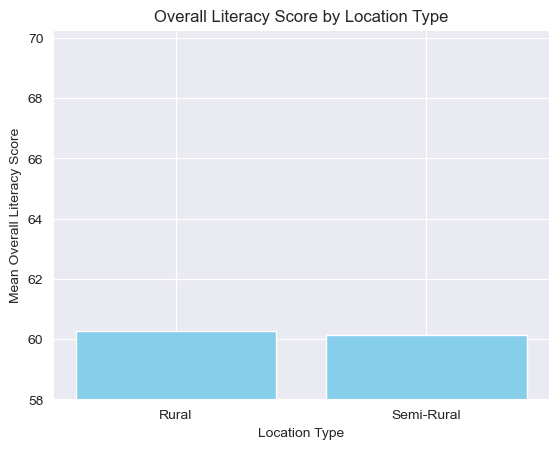

Mean Difference: 0.15


In [61]:

mean_scores = digl_df.groupby('Location_Type')['Overall_Literacy_Score'].mean().reset_index()


mean_scores = mean_scores[mean_scores['Location_Type'].isin(['Semi-Rural', 'Rural'])]


plt.bar(mean_scores['Location_Type'], mean_scores['Overall_Literacy_Score'], color='skyblue')

plt.ylim([58, max(mean_scores['Overall_Literacy_Score']) + 10])

plt.title('Overall Literacy Score by Location Type')

plt.xlabel('Location Type')

plt.ylabel('Mean Overall Literacy Score')

plt.xticks(rotation=0)

plt.show()

mean_scores = digl_df.groupby('Location_Type')['Overall_Literacy_Score'].mean()
semi_rural_mean = mean_scores['Semi-Rural']
rural_mean = mean_scores['Rural']
mean_difference = rural_mean - semi_rural_mean

print(f"Mean Difference: {mean_difference:.2f}")


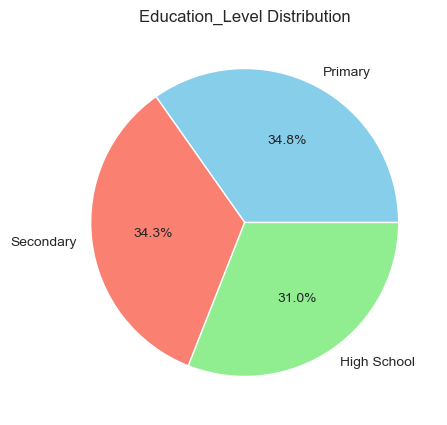

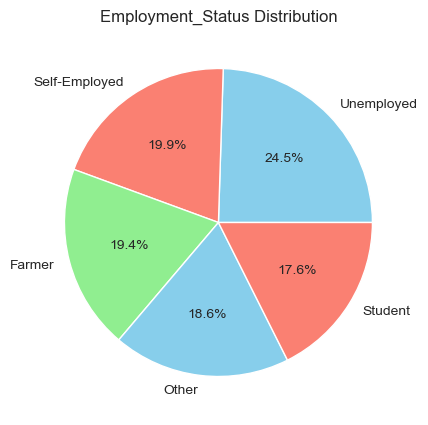

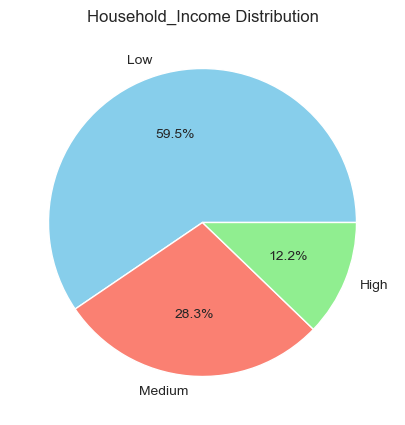

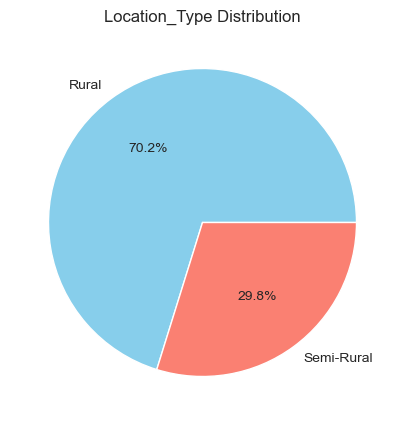

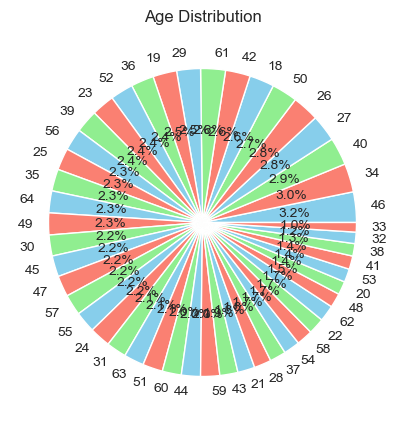

In [ ]:

def pieChart(df, column_names):
    sns.set_style("whitegrid")
    color_palette = ['skyblue', 'salmon', 'lightgreen']  

    for column in column_names:
    
        distribution = df[column].value_counts()
        
        distribution_df = distribution.reset_index()
        
        distribution_df.columns = ['labels', 'values']
        
        

        fig, ax = plt.subplots(figsize=(10, 5))
        
        
        plt.pie(distribution_df['values'], labels=distribution_df['labels'], autopct='%1.1f%%', colors=color_palette[:len(distribution_df)])
        
        plt.title(f"{column} Distribution")
       
        plt.show()


Ccolumns = ['Education_Level', 'Employment_Status', 'Household_Income', 'Location_Type']
pieChart(digl_df, Ccolumns)



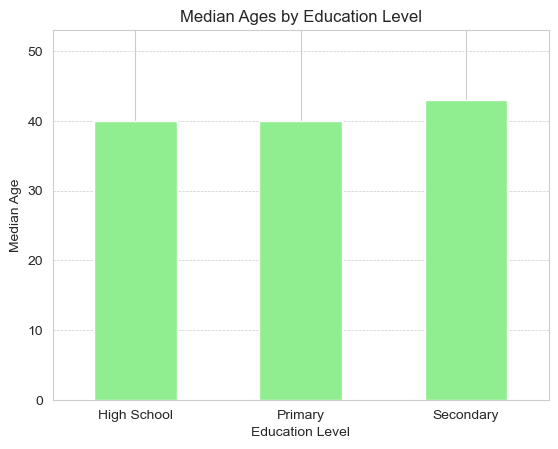

In [ ]:

filtered_df = digl_df[digl_df['Education_Level'].isin(['Primary', 'High School', 'Secondary'])]

median_ages_education = filtered_df.groupby('Education_Level')['Age'].median()

median_ages_education.plot(kind='bar', color='lightgreen')

plt.title('Median Ages by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Median Age')
plt.xticks(rotation=0)
plt.ylim([0, max(median_ages_education) + 10])
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.show()


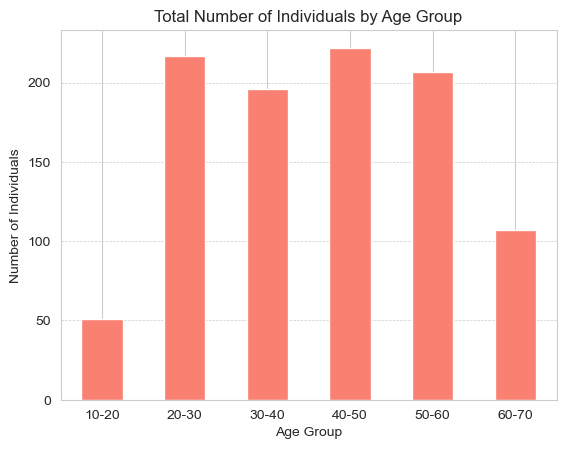

In [ ]:

bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

digl_df['Age_Group'] = pd.cut(digl_df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = digl_df['Age_Group'].value_counts().sort_index()

age_group_counts.plot(kind='bar', color='salmon')

plt.title('Total Number of Individuals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)




The median overall literacy score for the 10-20 age group is 60.6
The median overall literacy score for the 20-30 age group is 59.4
The median overall literacy score for the 30-40 age group is 59.849999999999994
The median overall literacy score for the 40-50 age group is 60.599999999999994
The median overall literacy score for the 50-60 age group is 60.8
The median overall literacy score for the 60-70 age group is 61.3


C:\Users\NV\AppData\Local\Temp\ipykernel_2960\3297301546.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_scores_age_group = digl_df.groupby('Age_Group')['Overall_Literacy_Score'].median()


In [35]:
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

digl_df['Age_Group'] = pd.cut(digl_df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = digl_df['Age_Group'].value_counts().sort_index()

average_age_group_count = age_group_counts.mean()

print(f"The average number of individuals in each age group is {average_age_group_count:.2f}")

The average number of individuals in each age group is 166.67


The total number of individuals in the 10-20 age group is 51
The total number of individuals in the 20-30 age group is 217
The total number of individuals in the 30-40 age group is 196
The total number of individuals in the 40-50 age group is 222
The total number of individuals in the 50-60 age group is 207
The total number of individuals in the 60-70 age group is 107


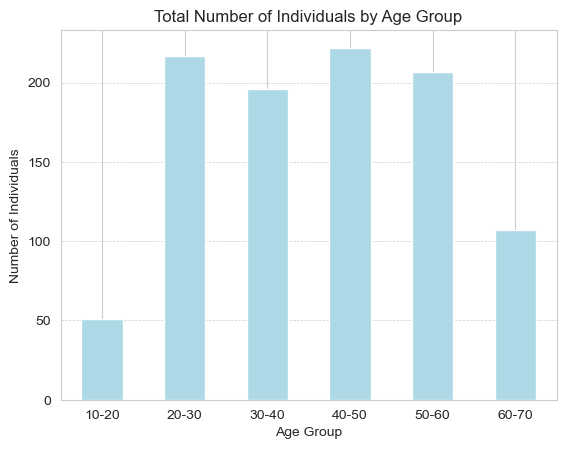

In [ ]:
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

digl_df['Age_Group'] = pd.cut(digl_df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = digl_df['Age_Group'].value_counts().sort_index()

for age_group, count in age_group_counts.items():
    print(f"The total number of individuals in the {age_group} age group is {count}")

age_group_counts.plot(kind='bar', color='lightblue')

plt.title('Total Number of Individuals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.show()


In [ ]:

overall_literacy_score_by_location = digl_df.groupby('Location_Type')['Overall_Literacy_Score'].mean()


print(overall_literacy_score_by_location)

pretraining_score_by_location = digl_df.groupby('Location_Type')['Basic_Computer_Knowledge_Score'].mean()


print(pretraining_score_by_location)


posttraining_score_by_location = digl_df.groupby('Location_Type')['Post_Training_Basic_Computer_Knowledge_Score'].mean()


print(posttraining_score_by_location)


filtered_df = digl_df[digl_df['Education_Level'].isin(['Primary', 'High School', 'Secondary'])]


mean_scores_education = filtered_df.groupby('Education_Level')[['Basic_Computer_Knowledge_Score', 'Post_Training_Basic_Computer_Knowledge_Score']].mean()


print(mean_scores_education)


filtered_df = digl_df[digl_df['Education_Level'] == 'High School']


mean_scores_highschool = filtered_df[['Basic_Computer_Knowledge_Score', 'Post_Training_Basic_Computer_Knowledge_Score']].mean()

score_difference = mean_scores_highschool['Post_Training_Basic_Computer_Knowledge_Score'] - mean_scores_highschool['Basic_Computer_Knowledge_Score']


print(f"The difference between post-training and pre-training scores for the High School section is {score_difference:.2f}")


mean_scores_education = filtered_df.groupby('Education_Level')[['Basic_Computer_Knowledge_Score', 'Post_Training_Basic_Computer_Knowledge_Score']].mean()


filtered_df = digl_df[digl_df['Education_Level'].isin(['Primary', 'High School', 'Secondary'])]


mean_scores_education = filtered_df.groupby('Education_Level')[['Basic_Computer_Knowledge_Score', 'Post_Training_Basic_Computer_Knowledge_Score']].mean()

primary_difference = mean_scores_education.loc['Primary', 'Post_Training_Basic_Computer_Knowledge_Score'] - mean_scores_education.loc['Primary', 'Basic_Computer_Knowledge_Score']
highschool_difference = mean_scores_education.loc['High School', 'Post_Training_Basic_Computer_Knowledge_Score'] - mean_scores_education.loc['High School', 'Basic_Computer_Knowledge_Score']
secondary_difference = mean_scores_education.loc['Secondary', 'Post_Training_Basic_Computer_Knowledge_Score'] - mean_scores_education.loc['Secondary', 'Basic_Computer_Knowledge_Score']




Location_Type
Rural         60.274501
Semi-Rural    60.126510
Name: Overall_Literacy_Score, dtype: float64
Location_Type
Rural         24.905983
Semi-Rural    25.120805
Name: Basic_Computer_Knowledge_Score, dtype: float64
Location_Type
Rural         59.877493
Semi-Rural    60.761745
Name: Post_Training_Basic_Computer_Knowledge_Score, dtype: float64
                 Basic_Computer_Knowledge_Score  \
Education_Level                                   
High School                           25.311475   
Primary                               24.974453   
Secondary                             24.792593   

                 Post_Training_Basic_Computer_Knowledge_Score  
Education_Level                                                
High School                                         60.467213  
Primary                                             60.270073  
Secondary                                           59.903704  
The difference between post-training and pre-training scores for the High